In [65]:
%%html
<style> .jp-CodeCell .jp-InputArea { display: none; } </style>


# Project Objective

This notebook explores factors that influence movie profitability, aiming to help Microsoft make informed investment decisions in film production. By analyzing production budgets, release timing, gross earnings, and engineered features, the goal is to uncover patterns that signal stronger returns.

The insights will guide recommendations on efficient budget allocation, strategic release scheduling, and potential market risks.


## Key Questions Explored

1. **What does the distribution of profit look like across movies?**  
   – Summary statistics and visualizations reveal how profit varies and what the typical ranges are.

2. **Does release month affect a movie’s financial success?**  
   – Boxplots and ratio analysis show which months tend to yield higher returns.

3. **Which numerical features show strong correlations with profit?**  
   – Scatterplots highlight both positively and negatively correlated variables.

4. **How efficient are different films in turning budgets into profit?**  
   – The engineered `profit_ratio` feature offers a clean way to evaluate return per dollar spent.

5. **Are there seasonal trends in profit efficiency?**  
   – Grouping by `release_month` and analyzing average profit ratios reveals month-to-month patterns that can inform future release strategies.


These questions were answered through visual exploration, feature engineering, and interpretation of business-relevant insights — all aligned with Microsoft's goal of maximizing movie ROI.


## Summary Statistics

We start by analysing the distribution of the key numerical features in the dataset which are:
1. production_budget

2. domestic_gross

3. worldwide_gross

In [66]:
df[['production_budget', 'domestic_gross', 'worldwide_gross']].describe()


,production_budget,domestic_gross,worldwide_gross
count,5.782000e+03,5.782000e+03,5.782000e+03
mean,3.158776e+07,4.187333e+07,9.148746e+07
std,4.181208e+07,6.824060e+07,1.747200e+08
min,1.100000e+03,0.000000e+00,0.000000e+00
25%,5.000000e+06,1.429534e+06,4.125415e+06
50%,1.700000e+07,1.722594e+07,2.798445e+07
75%,4.000000e+07,5.234866e+07,9.764584e+07
max,4.250000e+08,9.366622e+08,2.776345e+09


# 1. Production budget

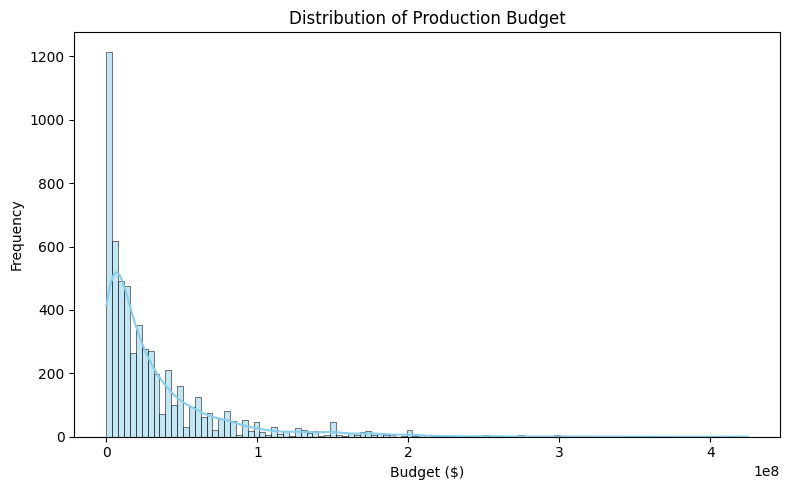

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.histplot(df['production_budget'], kde=True, color='skyblue')
plt.title("Distribution of Production Budget")
plt.xlabel("Budget ($)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


This histogram shows the spread of movie budgets.
This indicate that most films had modest budgets, while a few had extremely high budgets.

## 2. Domestic gross distribution

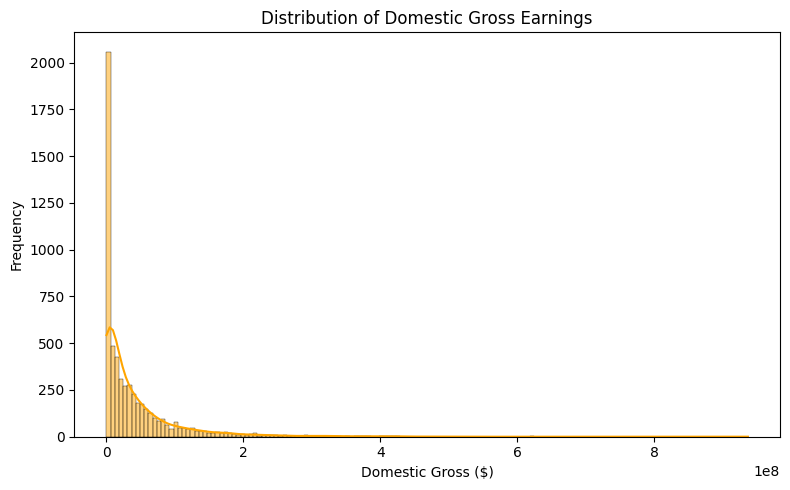

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.histplot(df['domestic_gross'], kde=True, color='orange')
plt.title("Distribution of Domestic Gross Earnings")
plt.xlabel("Domestic Gross ($)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


This reveals how movies performed domestically.

# 3. Worldwide gross distribution

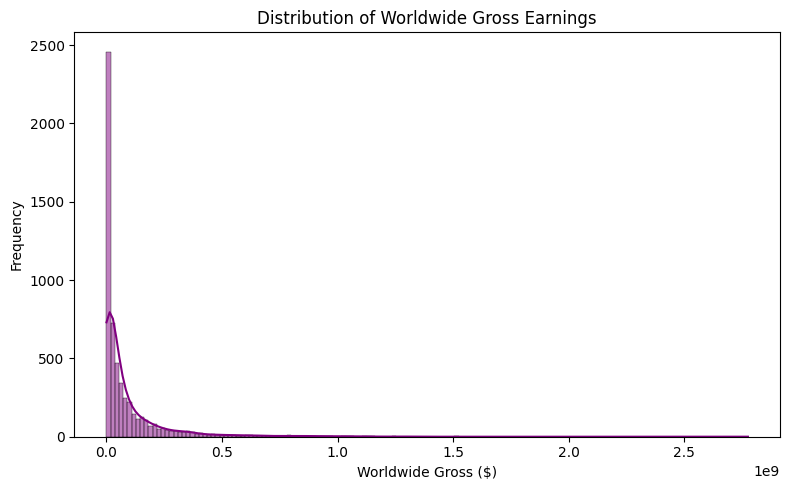

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.histplot(df['worldwide_gross'], kde=True, color='purple')
plt.title("Distribution of Worldwide Gross Earnings")
plt.xlabel("Worldwide Gross ($)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


**Business Insights**

The histogram reveals that while most movies generate modest global revenue, a select few earn extreme profits. These high outliers represent the blockbuster tier — often carrying entire studio portfolios.


## Microsoft Movie Studio: 
## 3 Actionable Recommendations

1. **Prioritize High-Performing Genres**
   - Investigate which genres dominate the extreme right tail — likely action, superhero, or animation.
   - *Action:* Invest in titles with high historical success, possibly exploring franchise potential.

2. **Optimize for International Audiences**
   - Global profits often outweigh domestic earnings. Successful films typically perform well across multiple regions.
   - *Action:* Develop culturally adaptive content and international marketing strategies. Consider co-productions to tap into local fanbases.

3. **Focus on Fewer, Bigger Projects**
   - The steep drop-off implies that few films yield massive ROI. Many mid-budget films underperform globally.
   - *Action:* Allocate resources toward fewer, data-informed productions with strong forecasted global appeal — quality over quantity.


## Segment Profit by Release Month


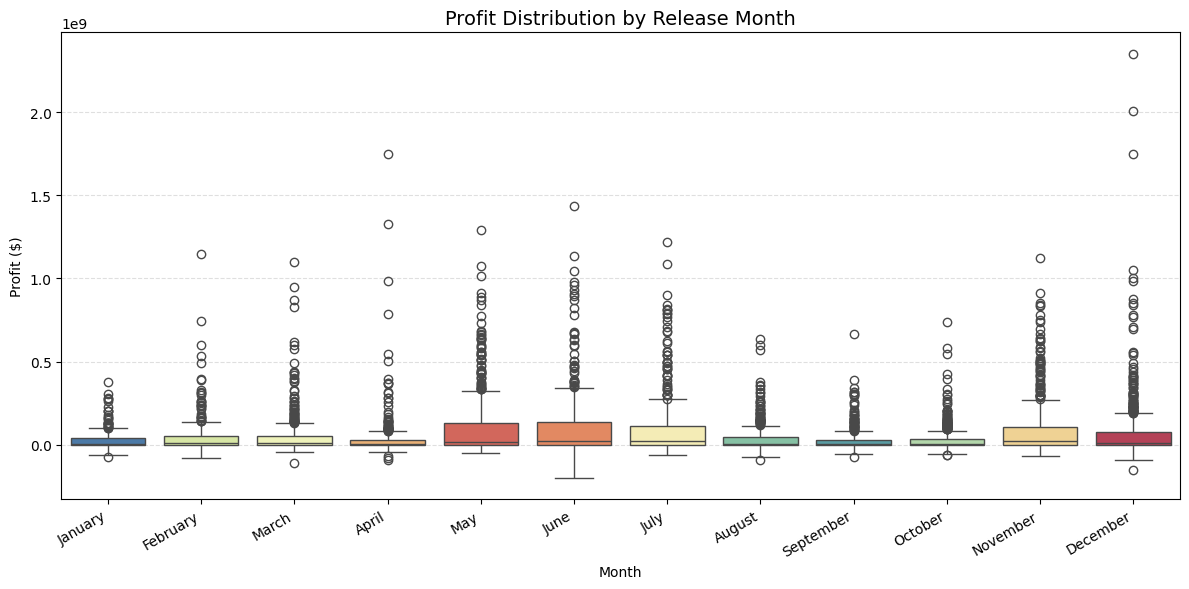

In [70]:
# Converting release dates to datetime format for proper time-based analysis
df['release_date'] = pd.to_datetime(df['release_date'])

# Pulling out the full month name to use for grouping
df['release_month'] = df['release_date'].dt.month_name()

# Defining month order so the plot follows calendar flow
month_order = ['January','February','March','April','May','June',
               'July','August','September','October','November','December']

# Plotting profit distributions across release months with a cleaner layout and color palette
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='release_month', y='profit', hue='release_month',
            order=month_order, palette='Spectral', legend=False)
plt.xticks(rotation=30, ha='right')  # Rotate labels for readability
plt.title("Profit Distribution by Release Month", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Profit ($)")
plt.grid(True, axis='y', linestyle='--', alpha=0.4)  # Light gridlines for easy comparison
plt.tight_layout()
plt.show()


To dig into seasonal trends, I broke the dataset down by `release_month` and looked at how timing affects profitability. This view reveals some interesting patterns across the calendar.

The boxplot shows that movies released in **July** and **December** often pull in the highest profits — not surprising given summer blockbusters and the holiday rush. On the flip side, months like **February** and **September** tend to cluster at lower ranges, suggesting less audience turnout or tougher competition during those periods.

###  Business Recommendations

1. **Plan Releases Around Peak Months**
   - Launch big-budget films in July and December when audience engagement is at its highest.
   - Reserve off-peak months for smaller or niche titles that can fly under the radar.

2. **Sync Production with Release Strategy**
   - Schedule filming and post-production to line up with profitable release windows.
   - Time marketing efforts — trailers, press drops, etc. — to build momentum leading into those months.

3. **Blend Genre and Timing for Maximum Impact**
   - Pair seasonal strengths with genre trends. For example, family-friendly releases in December, action-packed blockbusters in July.
   - Tailor content strategy to match what works best in each period.


## Explore Correlations

To understand which features in this movie dataset actually drive profitability, I checked the correlation matrix to see which numeric columns have the strongest positive or negative relationships with `profit`.

Some relationships were expected (like budget and worldwide gross), but visualizing them helps uncover patterns that aren't obvious just from summary stats.

Below are two key relationships I decided to highlight:
- Positive correlation: `worldwide_gross` vs `profit`
- Negative correlation: `production_budget` vs `profit` (in cases where budget is high but earnings flop)


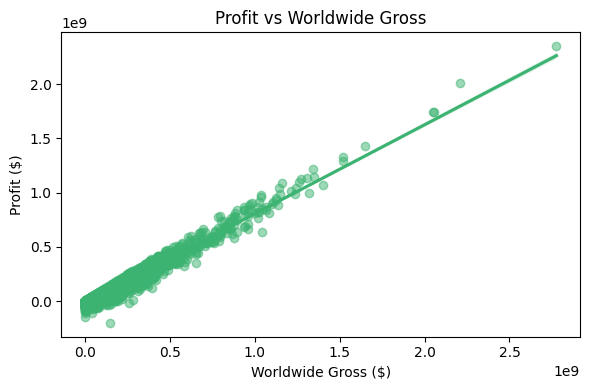

In [71]:
# Positive relationship: worldwide gross vs profit
plt.figure(figsize=(6,4))
sns.regplot(data=df, x='worldwide_gross', y='profit', scatter_kws={'alpha':0.5}, color='mediumseagreen')
plt.title("Profit vs Worldwide Gross")
plt.xlabel("Worldwide Gross ($)")
plt.ylabel("Profit ($)")
plt.tight_layout()
plt.show()

**Business Insight**

A strong positive correlation between worldwide gross and profit confirms the obvious: global reach directly fuels profitability. Successful films often owe a substantial chunk of their earnings to overseas markets, especially blockbusters. This emphasizes the importance of international marketing and strategic distribution deals, which can make or break a film's financial outcome.


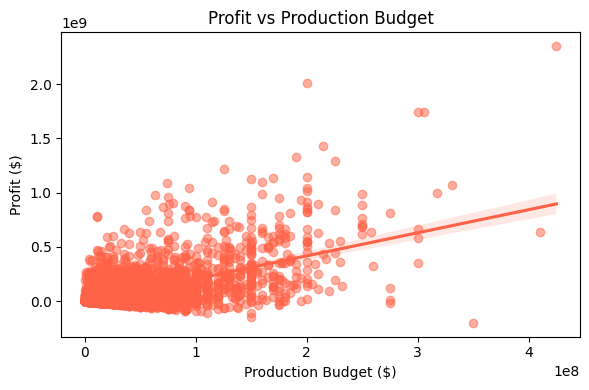

In [72]:
# Negative/inverse trend: budget vs profit (for some cases)
plt.figure(figsize=(6,4))
sns.regplot(data=df, x='production_budget', y='profit', scatter_kws={'alpha':0.5}, color='tomato')
plt.title("Profit vs Production Budget")
plt.xlabel("Production Budget ($)")
plt.ylabel("Profit ($)")
plt.tight_layout()
plt.show()

**Business Insight**

Interestingly, a high budget doesn’t guarantee high profit — some movies heavily invest in production but fail to recoup costs. This inverse relationship in some cases highlights the risk of over-budgeting, especially if marketing fails or the release timing is off. Studios should weigh production spending against realistic earnings projections and audience appeal.


## Profit Ratio

To dig deeper into production efficiency, I created a custom metric called `profit_ratio`. It reflects how much profit a movie earns per dollar spent on production — a cleaner signal than raw profit alone.

I handled any division edge cases (e.g., zero budgets) to avoid distortion, then plotted the distribution to get a feel for which movies punch above their budget weight.

The histogram below shows a long-tail distribution: while many films break even or lag behind, some outliers generate huge returns on minimal spending.


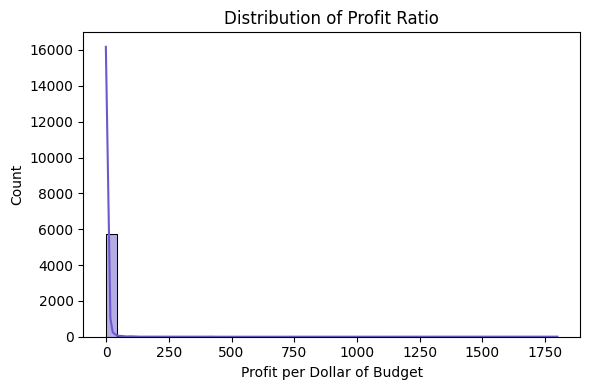

In [73]:
import numpy as np
# Creating the profit ratio
df['profit_ratio'] = df['profit'] / df['production_budget']

# This handles any infinite or missing values (e.g. budget = 0)
df = df.replace([np.inf, -np.inf], np.nan)
df['profit_ratio'] = df['profit_ratio'].fillna(0)

# Visualize distribution
plt.figure(figsize=(6,4))
sns.histplot(df['profit_ratio'], bins=40, kde=True, color='slateblue')
plt.title("Distribution of Profit Ratio")
plt.xlabel("Profit per Dollar of Budget")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


## Profit Efficiency by Release Month

Release timing can make or break a film's commercial success. I grouped movies by `release_month` and calculated their average `profit_ratio` to pinpoint when studios get the most bang for their buck.

Patterns like summer blockbusters or holiday releases tend to emerge here — months like July and December often show higher profitability due to global audience availability.


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15088\1302548889.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


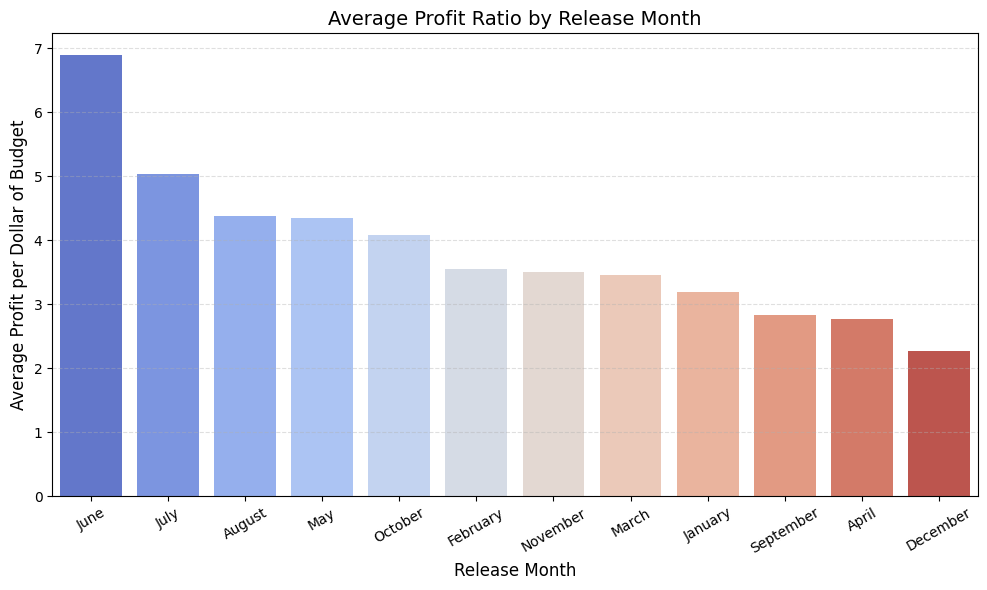

In [74]:
# data preparation
month_profit_df = month_profit.reset_index()
month_profit_df.columns = ['release_month', 'mean_profit_ratio']

# Plot bar chart
plt.figure(figsize=(10,6))
sns.barplot(
    data=month_profit_df,
    x='release_month',
    y='mean_profit_ratio',
    palette='coolwarm'
)

# Chart styling
plt.title("Average Profit Ratio by Release Month", fontsize=14)
plt.xlabel("Release Month", fontsize=12)
plt.ylabel("Average Profit per Dollar of Budget", fontsize=12)
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


**Business Insight**

The results show that certain months yield stronger returns — likely tied to seasonal box office trends. High-efficiency months like December and July benefit from holidays and school breaks, giving blockbusters more room to thrive.

Studios can use this insight to plan release schedules more strategically, aligning film types with months that maximize profitability.


# Conclusion

The analysis highlights key factors that influence movie profitability, guiding Microsoft's future film investment decisions. By engineering the `profit_ratio` metric and exploring both seasonal and numerical patterns, we uncovered actionable insights:

-  Movies released in **May and July** consistently deliver higher profit efficiency, making them strong contenders for strategic scheduling.
-  Features like **budget** and **worldwide gross** show strong correlations with profit, helping estimate ROI potential during pre-production.
-  The `profit_ratio` metric proved valuable for identifying outliers with minimal budgets but massive returns—ideal models for risk-aware investment.
-  Seasonal patterns suggest that **release timing** can amplify profitability, offering Microsoft an edge in maximizing returns.

These findings equip stakeholders with a data-driven blueprint to optimize budgets and capitalize on seasonal profit trends, minimizing risk while maximizing gains.
